       index  Rot.err.(deg/100m)  Trans.err.(%)  length      speed
0          0            0.000147       0.005210     100  18.181818
1          0            0.000221       0.007287     200  20.202020
2          0            0.000128       0.011890     300  20.979021
3          0            0.000159       0.014229     400  19.704433
4          0            0.000199       0.023841     500  17.543860
...      ...                 ...            ...     ...        ...
20382   4000            0.000435       0.018812     100  14.285714
20383   4010            0.000309       0.033983     100  12.987013
20384   4020            0.000360       0.014997     100  12.820513
20385   4030            0.000436       0.018461     100  12.820513
20386   4040            0.000092       0.020651     100  12.048193

[20387 rows x 5 columns]
              index  Rot.err.(deg/100m)  Transl. Error [%]  Path Length  \
cfear1 0          0            0.000147           0.520958          100   
       1          0 

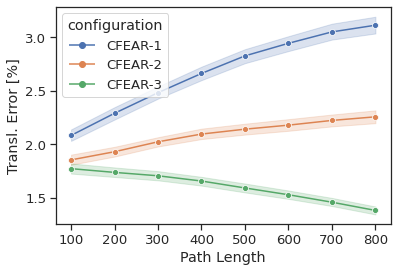

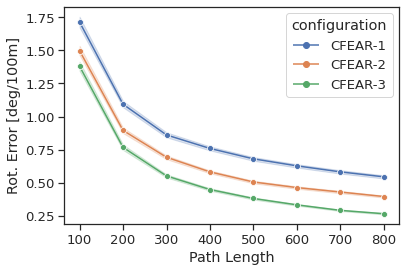

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import math


sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks",font_scale=1.2)
#sns.set()  # crazy big
colors = ["#E59866", "#D35400", "#873600", "#85C1E9", "#3498DB", "#2874A6"]
pal=sns.color_palette(colors)
mart=['o','o','o']
marr=['v','v','v']
lin=dashes=[(3, 0), (3, 0), (3, 0)]
lin2=dashes=[(3, 1), (3, 1), (3, 1)]




d1 = pd.read_csv('./mulran_cfear-1_2021-09-22_18:32_concatinated.txt', sep=r' ', header=0)
d2 = pd.read_csv('./mulran_cfear-2_2021-09-22_18:33_concatinated.txt', sep=r' ', header=0)
d3 = pd.read_csv('./mulran_cfear-3_2021-09-22_18:34_concatinated.txt', sep=r' ', header=0)

#d1 = pd.read_csv('./oxford_cfear1_2021-09-22_18:18_concatinated.txt', sep=r' ', header=0)
#d2 = pd.read_csv('./oxford_cfear2_2021-09-22_18:20_concatinated.txt', sep=r' ', header=0)
#d3 = pd.read_csv('./oxford_cfear3_2021-09-22_18:22_concatinated.txt', sep=r' ', header=0)

d1t=d1.copy(deep=True)
d1r=d1.copy(deep=True)
d1t["configuration"]="CFEAR-1"#-transl. error"
d1r["configuration"]="CFEAR-1"#-rot. error"


d2t=d2.copy(deep=True)
d2r=d2.copy(deep=True)
d2t["configuration"]="CFEAR-2"#-transl. error"
d2r["configuration"]="CFEAR-2"#-rot. error"

d3t=d3.copy(deep=True)
d3r=d3.copy(deep=True)
d3t["configuration"]="CFEAR-3"#-transl. error"
d3r["configuration"]="CFEAR-3"#-rot. error"
print(d1)
#df=pd.concat([d1,d2,d3])
dft = pd.concat([d1t,d2t,d3t], keys=["cfear1", "cfear2", "cfear3"])
dfr = pd.concat([d1r,d2r,d3r], keys=["cfear1", "cfear2", "cfear3"])

#print(df)
dft = dft.rename(columns={'Trans.err.(%)': 'Transl. Error [%]'})
#dft = dft.rename(columns={'Rot.err.(deg/100m)': 'Rot. Error [deg/100m]'})
dft = dft.rename(columns={'length': 'Path Length'})

#dfr = dfr.rename(columns={'Trans.err.(%)': 'Transl. Error [%]'})
dfr = dfr.rename(columns={'Rot.err.(deg/100m)': 'Rot. Error [deg/100m]'})
dfr = dfr.rename(columns={'length': 'Path Length'})


#df = df[~df.index.duplicated()]
#print(d1)
dfr['Rot. Error [deg/100m]'] = dfr['Rot. Error [deg/100m]']*180/math.pi*100 
dft['Transl. Error [%]'] = dft['Transl. Error [%]']*100
print(dft)
#markers = {"CFEAR-1": "o", "CFEAR-2": "o", "CFEAR-3": "o"}

#ax2 = ax1.twinx()

#ax2 = ax1.twinx()
fig, ax1 = plt.subplots(figsize=(6,4))
#ax1.set(ylim=(1.2, 
#             3.2))
#with sns.plotting_context(font_scale=0.7):
sns.lineplot(data=dft,x='Path Length', y="Transl. Error [%]", hue="configuration",markers=mart, dashes=lin,legend=True ,style="configuration",ax=ax1) #legend=True
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
fig=ax1.get_figure()
fig.savefig('./output/PathErrorMulranTrans.pdf',bbox_inches = 'tight', format='pdf')
fig.savefig('./output/PathErrorMulranTrans.png',bbox_inches = 'tight', format='png', dpi=300)


#ax1.legend(['A simple line'])


fig2, ax2 = plt.subplots(figsize=(6,4))
sns.lineplot(
        data=dfr,
        x='Path Length', y="Rot. Error [deg/100m]", hue="configuration",markers=mart, dashes=lin,legend=True ,style="configuration",ax=ax2) #legend=True
fig=ax2.get_figure()
fig.savefig('./output/PathErrorMulranRot.pdf',bbox_inches = 'tight', format='pdf')
fig.savefig('./output/PathErrorMulranRot.png',bbox_inches = 'tight', format='png', dpi=300)

#sns.lineplot(
#    data=df,
#    x="Path Length", y="Rot. Error [deg/100m]", hue="configuration", style="configuration",
#    markers=True, dashes=False
#)

#ax1=sns.lineplot(data=dd, x="Path length", y="Rotation error (deg/100m)", color='red',label = 'Rotation error (deg/100m)', legend=False) 
#plt.legend(loc='upper center') 
#ax1.tick_params(axis='y', labelcolor='red') 
#sns_plot = sns.pointplot(x="Path length", y="Rot.err.(deg/100m)", data=dd, legend_out=False,palette=sns.color_palette(["#FF0000"]),linestyles=["-", "--"])
#ax2 = ax1.twinx() 
#sns.lineplot(data=dfr, 
#             x="Path Length", 
#             y="Rot. Error [deg/100m]",hue="configuration", legend=False,markers=marr,dashes=lin2,ax=ax1,style="configuration")  #E59866 # legend=True
#ax1.legend(['CFEAR-1-transl. error', 'CFEAR-2-transl. error', 'CFEAR-3-transl. error' , 'CFEAR-1-rot. error', 'CFEAR-2-rot. error' , 'CFEAR-3-rot. error'], facecolor='w', loc=2,
#       ncol=2, mode="expand", borderaxespad=0.0) #bbox_to_anchor=(0, 0, 0, 0)
#legend()
#plt.show()


#d1['config'] = w['sequence'].apply({'male':0, 'female':1}.get)




#sns_plot=sns.pointplot( x="resolution r [m]", y="RPE [m]", hue=cost_and_submap_str,
#                   data=df, dodge=True,palette=pal,markers=mar,linestyles=lin)


#fig.savefig('./output/PathErrorOxford.pdf', format='pdf')
#fig.savefig('./output/PathErrorOxford.png', format='png', dpi=300)

############################################################################################

